In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 70)


# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading the dataset

df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### **** This means that there are no null values in dataframe ****


In [5]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [6]:
len(list(df.country.unique()))

167

## EDA

#### Data Quality check


In [7]:
# Converting % columns to units

percntCol = ['exports','health','imports']

In [8]:
for c in percntCol:
    df[c] = (df[c] * df.gdpp)/100

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [11]:
col = list(df.columns[1:])

In [12]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

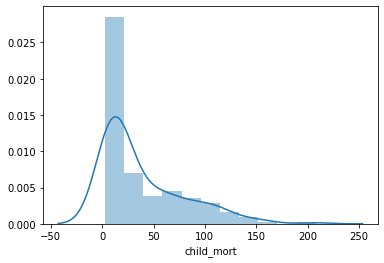

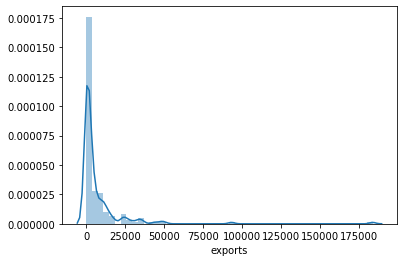

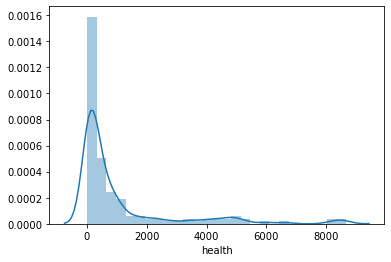

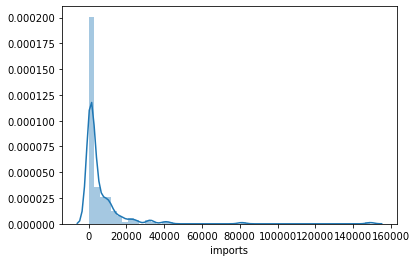

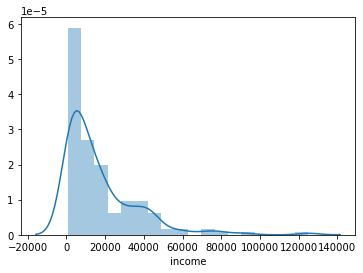

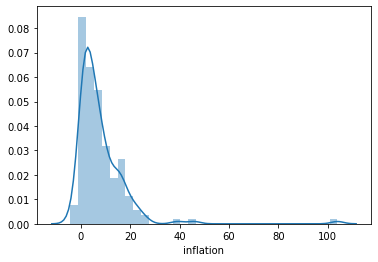

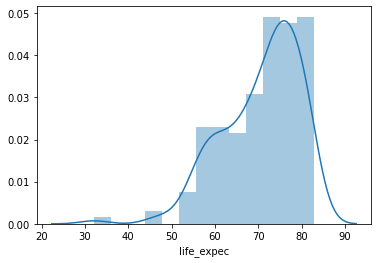

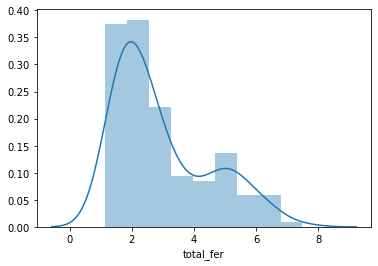

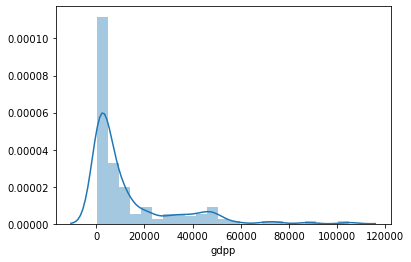

In [13]:
# Distribution of the columns: distplot()

for c in col:
    sns.distplot(df[c])
    plt.show();

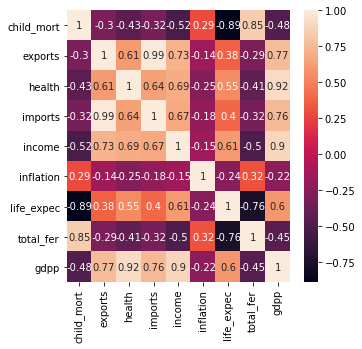

In [14]:
# Correlation Matrix

plt.figure(figsize=(5,5))
sns.heatmap(df[col].corr(), annot=True);

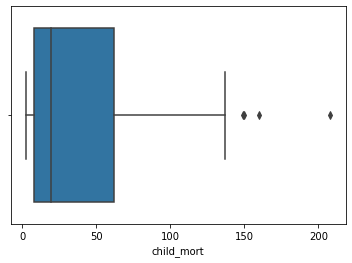

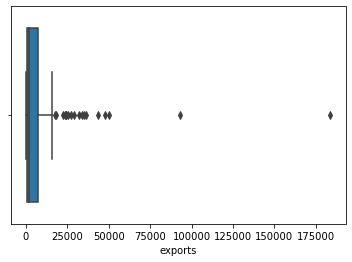

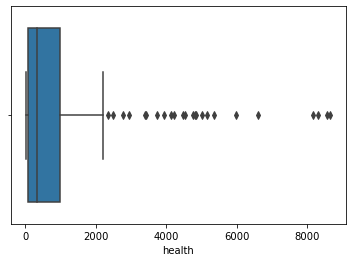

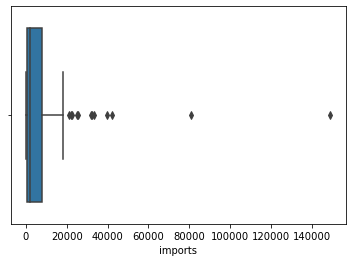

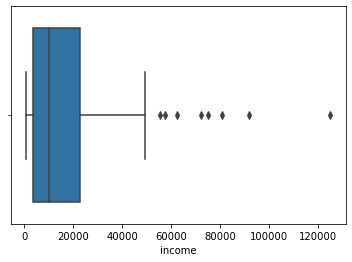

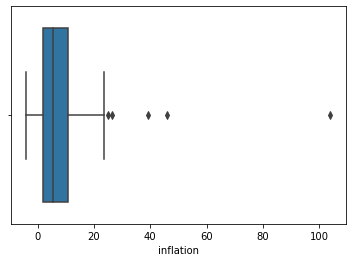

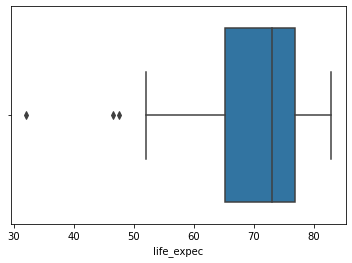

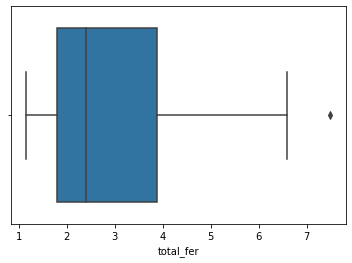

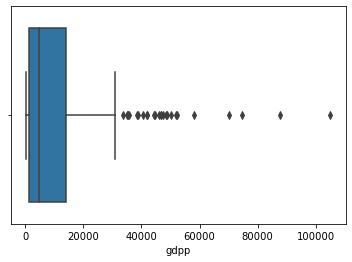

In [15]:
# Outlier Analysis

for _ in col:
    sns.boxplot(df[_])
    plt.show()

### Observation and next steps: 
- The variable like exports, health, import, income and GDPP have outliers which may effect the models so we are soft capping them beacause if we remove the data then we may loose some important insights.

In [16]:

col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [17]:
## exports

q2 = df['exports'].quantile(.99)
q2

64794.26000000014

In [18]:
df['exports'][df['exports']>=q2] = q2

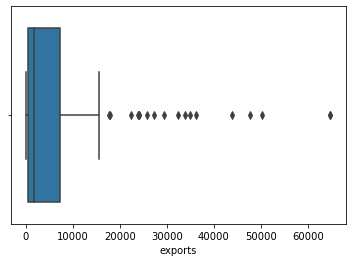

In [19]:
sns.boxplot(df.exports)

In [20]:
## health

q2 = df['health'].quantile(.98)
q2

7663.62000000001

In [21]:
df['health'][df['health']>=q2] = q2

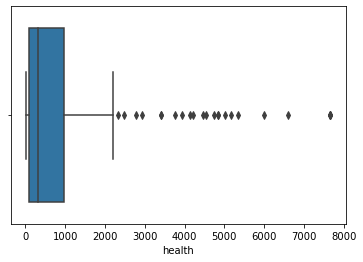

In [22]:
sns.boxplot(df.health)

In [23]:
## imports

q2 = df['imports'].quantile(.99)
q2

55371.39000000013

In [24]:
df['imports'][df['imports']>=q2] = q2

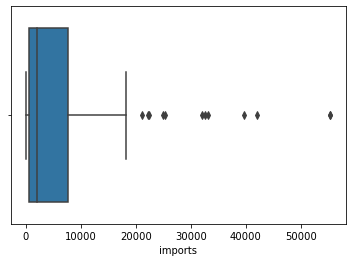

In [25]:
sns.boxplot(df.imports)

In [26]:
## income

q2 = df['income'].quantile(.99)
q2

84374.00000000003

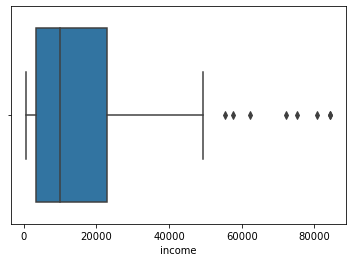

In [27]:
df['income'][df['income']>=q2] = q2
sns.boxplot(df.income)

In [28]:
## gdpp

q2 = df['gdpp'].quantile(.99)
q2

79088.00000000004

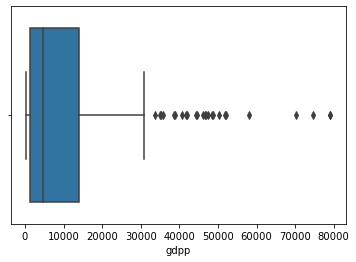

In [29]:
df['gdpp'][df['gdpp']>=q2] = q2
sns.boxplot(df.gdpp)

In [30]:
    df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [31]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
hopkins(df.drop('country',axis=1))

0.8681759864607602

In [33]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis=1))

In [35]:
df1 = pd.DataFrame(df1)
df1.columns = col
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.578451,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.447266,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.494818,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.544381,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.175718,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [36]:
#Calculating the Hopkins statistic for scaled data
hopkins(df1)

0.8862165004256796

#### Finding optimal number of clusters for KMeans

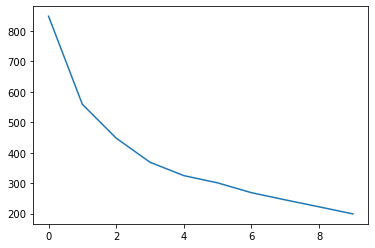

In [37]:
# elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

plt.plot(ssd)

#### Observation: 

In [38]:
# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.47994104905681456
For n_clusters=3, the silhouette score is 0.4218969014370761
For n_clusters=4, the silhouette score is 0.40916382370372417
For n_clusters=5, the silhouette score is 0.4154799162336913
For n_clusters=6, the silhouette score is 0.3167304477016163
For n_clusters=7, the silhouette score is 0.2970925296977723
For n_clusters=8, the silhouette score is 0.27478142064112404
For n_clusters=9, the silhouette score is 0.30197549772284205
For n_clusters=10, the silhouette score is 0.30572107195317416
For n_clusters=11, the silhouette score is 0.2808636271765948
For n_clusters=12, the silhouette score is 0.2580636849661787


#### Observation: 
***`The silhouette score looks good for clusters 3,5 and 4. Therefore, we'll check results for these three clusters.`***

### KMeans for k = 3

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
kmeans.fit(df1)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [40]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [41]:
df['cluster'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [42]:
df.cluster.value_counts()

1    90
0    48
2    29
Name: cluster, dtype: int64

In [43]:
sum(df.cluster.value_counts())

167

#### Visualizing the clusters

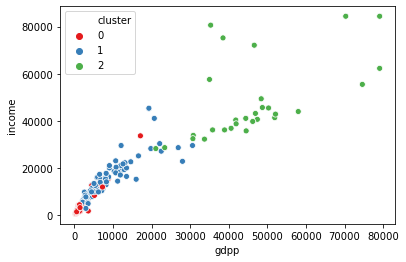

In [44]:
sns.scatterplot(x='gdpp', y='income', hue= 'cluster', data=df, palette='Set1')

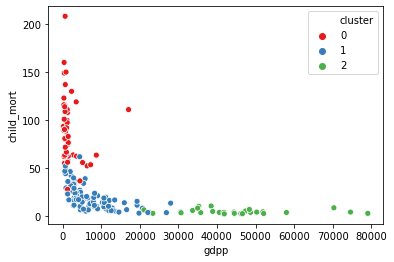

In [45]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster', data=df, palette='Set1') 

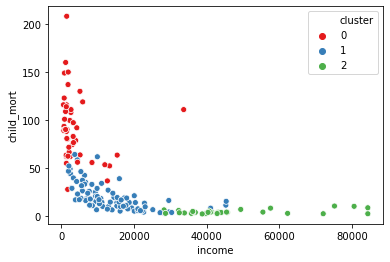

In [46]:
sns.scatterplot(x='income', y='child_mort', hue= 'cluster', data=df, palette='Set1')

### Observation: 
`Based on the above scatterplots 'Cluster 0' seems to be the one diplaying the under-developed countries.`

### Cluster profiling:
GDPP, CHILD_MORT and INCOME.

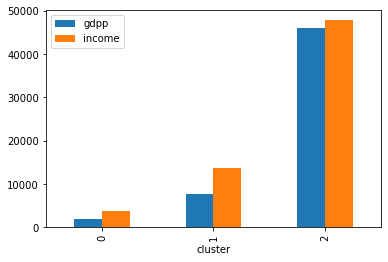

In [47]:
df[['gdpp','cluster', 'income']].groupby('cluster').mean().plot(kind= 'bar')

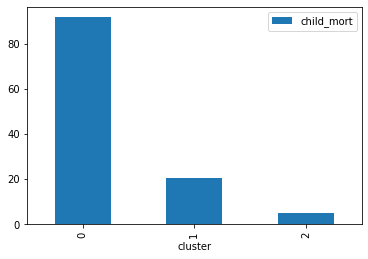

In [48]:
df[['cluster', 'child_mort']].groupby('cluster').mean().plot(kind= 'bar')

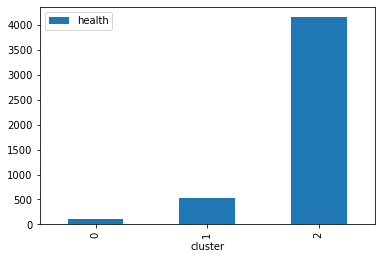

In [49]:
df[['cluster', 'health']].groupby('cluster').mean().plot(kind= 'bar')

### Observation: 
`'Cluster 0' correctly represents the under-developed countries, having low GDP, Income and Health expenditure per capita, and with high 'child mortality'.`

In [50]:
c0 = df[df.cluster==0]
c0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


In [51]:
c0.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,0


In [52]:
countries_0 = list(c0.country)
countries_0

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Uganda',
 'Guinea',
 'Haiti',
 'Tanzania',
 'Mali',
 'Benin',
 'Comoros',
 'Chad',
 'Kenya',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Nigeria',
 'Congo, Rep.',
 'Angola',
 'Timor-Leste',
 'Iraq',
 'Namibia',
 'Botswana',
 'South Africa',
 'Gabon',
 'Equatorial Guinea']

In [53]:
len(countries_0)

48

### KMeans = 4


In [54]:
kmeans = KMeans(n_clusters=4, max_iter=150, random_state=0)
kmeans.fit(df1)

KMeans(max_iter=150, n_clusters=4, random_state=0)

In [55]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [56]:
cluster_k4 = kmeans.labels_
cluster_k4 = pd.DataFrame(kmeans.labels_)
cluster_k4.columns=['cluster_k4']
cluster_k4

,cluster_k4
0,2
1,0
2,0
3,2
4,0
...,...
162,0
163,0
164,0
165,2


In [57]:
cluster_k4.cluster_k4.value_counts()

0    80
2    48
3    30
1     9
Name: cluster_k4, dtype: int64

In [58]:
sum(cluster_k4.cluster_k4.value_counts())

167

In [59]:
df['cluster_k4'] = cluster_k4['cluster_k4']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


#### Visualizing the clusters

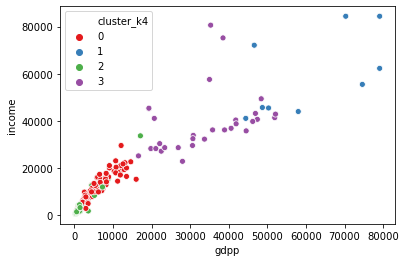

In [60]:
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_k4', data=df, palette='Set1')

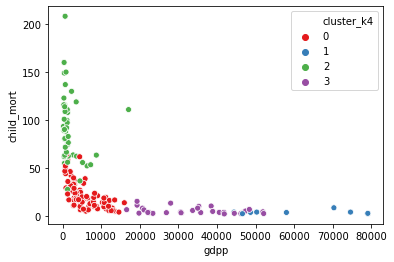

In [61]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_k4', data=df, palette='Set1') 

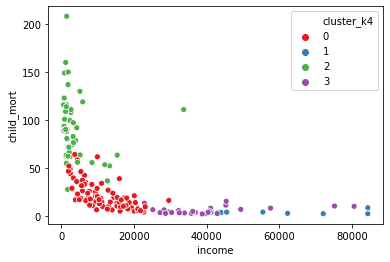

In [62]:
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_k4', data=df, palette='Set1')

### Observation: 
***`'Cluster 2' seems to represents the under-developed coutries.`***

### Cluster profiling:
GDPP, CHILD_MORT and INCOME.

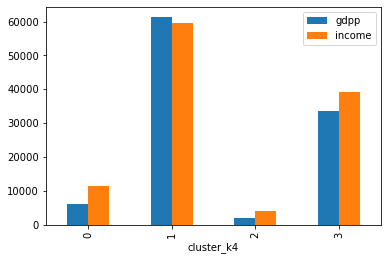

In [63]:
df[['gdpp','cluster_k4', 'income']].groupby('cluster_k4').mean().plot(kind= 'bar');

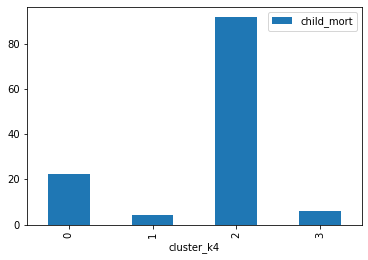

In [64]:
df[['cluster_k4', 'child_mort']].groupby('cluster_k4').mean().plot(kind= 'bar');

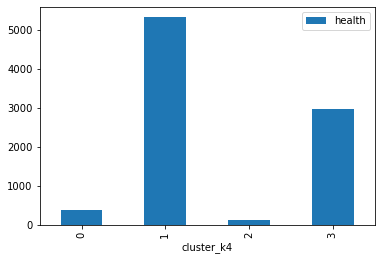

In [65]:
df[['cluster_k4', 'health']].groupby('cluster_k4').mean().plot(kind= 'bar');

#### Observation: 
***`Based on above graphs 'Cluster 2' seems to corretly represents the under-developed countries. Having low GDP,Income and helth expenditure (per capita) and with high child mortality rate.`***

In [66]:
c2 = df[df['cluster_k4']==2]

In [67]:
c2.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,0,2


In [68]:
list(c2.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Uganda',
 'Guinea',
 'Haiti',
 'Tanzania',
 'Mali',
 'Benin',
 'Comoros',
 'Chad',
 'Kenya',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Nigeria',
 'Congo, Rep.',
 'Angola',
 'Timor-Leste',
 'Iraq',
 'Namibia',
 'Botswana',
 'South Africa',
 'Gabon',
 'Equatorial Guinea']

In [69]:
comp = [c0.country,c2.country]
column = ['c0_k3','c2_k4']
compare = pd.concat(comp, axis = 1,keys=column)
compare

,c0_k3,c2_k4
26,Burundi,Burundi
88,Liberia,Liberia
37,"Congo, Dem. Rep.","Congo, Dem. Rep."
112,Niger,Niger
132,Sierra Leone,Sierra Leone
93,Madagascar,Madagascar
106,Mozambique,Mozambique
31,Central African Republic,Central African Republic
94,Malawi,Malawi
50,Eritrea,Eritrea


#### Observation: Clusters K=3 and K=4 represent the same countries as under-developed 

### KMeans = 5

In [70]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=0)
kmeans.fit(df1)

KMeans(max_iter=50, n_clusters=5, random_state=0)

In [71]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 3, 1, 4, 2, 3, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 3, 1, 0, 0,
       1, 2, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [72]:
cluster_k5 = kmeans.labels_
cluster_k5 = pd.DataFrame(kmeans.labels_)
cluster_k5.columns=['cluster_k5']
cluster_k5

,cluster_k5
0,1
1,0
2,0
3,1
4,0
...,...
162,0
163,0
164,0
165,1


In [73]:
cluster_k5.cluster_k5.value_counts()

0    80
1    47
3    30
2     9
4     1
Name: cluster_k5, dtype: int64

In [74]:
sum(cluster_k4.cluster_k4.value_counts())

167

In [75]:
df['cluster_k5'] = cluster_k5['cluster_k5']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,2,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0,0


#### Visualizing the clusters

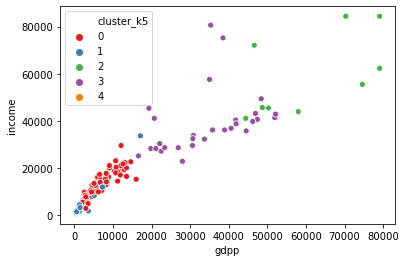

In [76]:
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_k5', data=df, palette='Set1')

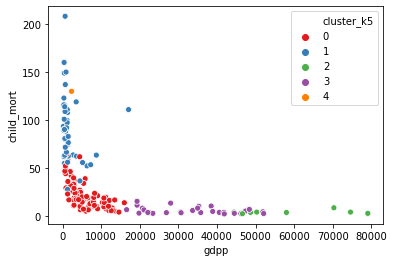

In [77]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_k5', data=df, palette='Set1') 

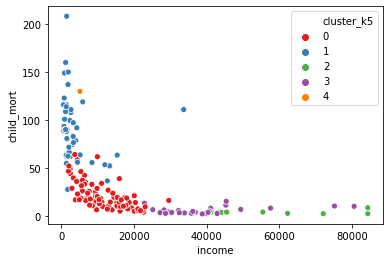

In [78]:
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_k5', data=df, palette='Set1')

### Cluster profiling:
GDPP, CHILD_MORT and INCOME.

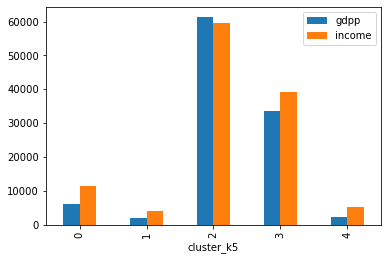

In [79]:
df[['gdpp','cluster_k5', 'income']].groupby('cluster_k5').mean().plot(kind= 'bar');

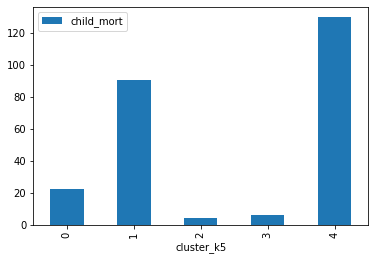

In [80]:
df[['cluster_k5', 'child_mort']].groupby('cluster_k5').mean().plot(kind= 'bar');

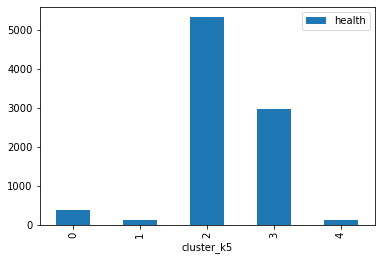

In [81]:
df[['cluster_k5', 'health']].groupby('cluster_k5').mean().plot(kind= 'bar');

#### Observation: 
***`Based on the scatter plots and cluster profiling 'Cluster 1' clearly represents the under-developed countries.`***

In [82]:
c1= df[df['cluster_k5']==1]
c1.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,2,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0,2,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,2,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0,2,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0,2,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,0,2,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0,2,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,2,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0,2,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,0,2,1


In [83]:
list(c1.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Uganda',
 'Guinea',
 'Haiti',
 'Tanzania',
 'Mali',
 'Benin',
 'Comoros',
 'Chad',
 'Kenya',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Congo, Rep.',
 'Angola',
 'Timor-Leste',
 'Iraq',
 'Namibia',
 'Botswana',
 'South Africa',
 'Gabon',
 'Equatorial Guinea']

# Hierarchial Clustering: Single linkage, Complete Linkage

In [84]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.578451,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.447266,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.494818,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.544381,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.175718,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


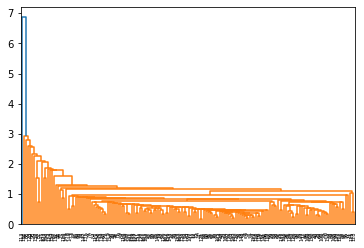

In [85]:
# single linkage

mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

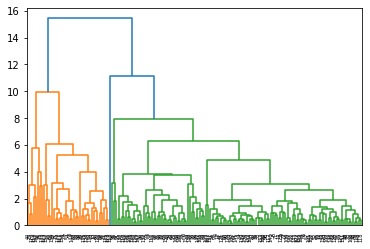

In [86]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [87]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [88]:
# assign cluster labels
df['k3_h'] = cluster_labels
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5,k3_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,2,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,2,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1,0,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,1,0,0,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,1,0,0,0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,2,3,3,1
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,2,3,3,1
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,1,0,0,0


In [89]:
df.k3_h.value_counts()

0    125
1     41
2      1
Name: k3_h, dtype: int64

#### Visualizing the clusters

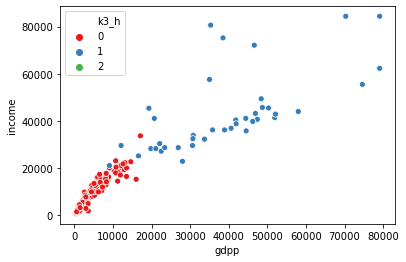

In [90]:
sns.scatterplot(x='gdpp', y='income', hue= 'k3_h', data=df, palette='Set1')

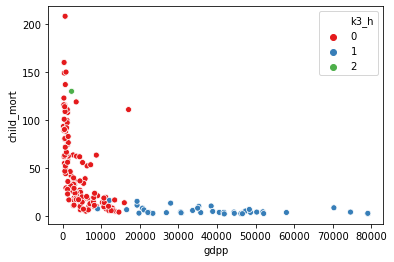

In [91]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'k3_h', data=df, palette='Set1') 

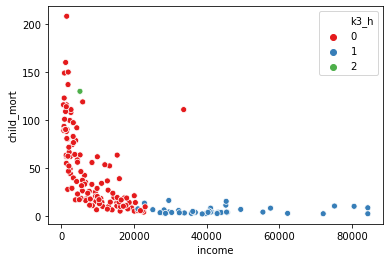

In [92]:
sns.scatterplot(x='income', y='child_mort', hue= 'k3_h', data=df, palette='Set1')

### Cluster Profiling

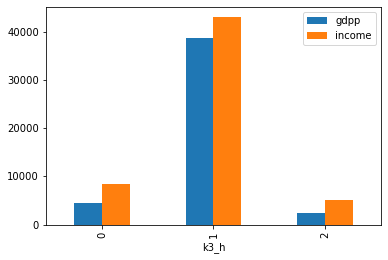

In [93]:
df[['gdpp','k3_h', 'income']].groupby('k3_h').mean().plot(kind= 'bar');

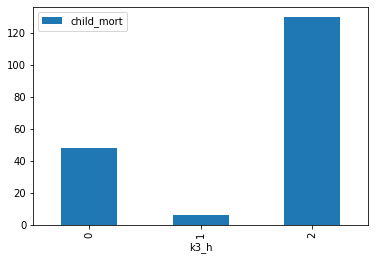

In [94]:
df[['k3_h', 'child_mort']].groupby('k3_h').mean().plot(kind= 'bar');

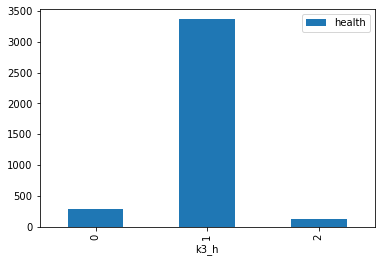

In [95]:
df[['k3_h', 'health']].groupby('k3_h').mean().plot(kind= 'bar');

### Observation: 'Cluster 0' seems to show the characteristics of under developed countries

In [96]:
c_3h = df[df.k3_h==0]

In [97]:
c_3h.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c_3h

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5,k3_h
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,2,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0,2,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,2,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0,2,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela,17.1,3847.5000,662.8500,2376.000,16500.0,45.900,75.4,2.47,13500.0,1,0,0,0
41,Croatia,5.5,5076.0000,1047.6000,5143.500,20100.0,0.821,76.3,1.55,13500.0,1,0,0,0
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700.0,1.740,76.0,1.72,14600.0,1,0,0,0
13,Barbados,14.2,6320.0000,1275.2000,7792.000,15300.0,0.321,76.7,1.78,16000.0,1,0,0,0


In [98]:
list(c_3h.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Nepal',
 'Uganda',
 'Guinea',
 'Haiti',
 'Tanzania',
 'Mali',
 'Tajikistan',
 'Benin',
 'Bangladesh',
 'Comoros',
 'Cambodia',
 'Kyrgyz Republic',
 'Chad',
 'Kenya',
 'Myanmar',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Vietnam',
 'India',
 'Uzbekistan',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Moldova',
 'Bolivia',
 'Philippines',
 'Bhutan',
 'Egypt',
 'Mongolia',
 'Congo, Rep.',
 'Sri Lanka',
 'Morocco',
 'Guatemala',
 'Micronesia, Fed. Sts.',
 'Georgia',
 'Vanuatu',
 'Ukraine',
 'El Salvador',
 'Guyana',
 'Indonesia',
 'Armenia',
 'Paraguay',
 'Cape Verde',
 'Samoa',
 'Angola',
 'Tonga',
 'Timor-Leste',
 'Fiji',
 'Jordan',
 'Albania',
 'Tunisia',
 'Belize',
 'Turkm

In [99]:
# 4 clusters

cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [100]:
# assign cluster labels

df['k4_h'] = cluster_labels
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5,k3_h,k4_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,2,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,2,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1,0,0,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,1,0,0,0,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,1,0,0,0,0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,2,3,3,1,1
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,2,3,3,1,1
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,1,0,0,0,0


In [101]:
df['k4_h'].value_counts()

0    125
1     33
2      8
3      1
Name: k4_h, dtype: int64

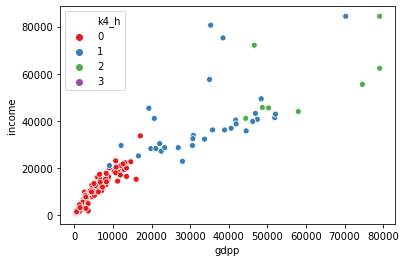

In [102]:
sns.scatterplot(x='gdpp', y='income', hue= 'k4_h', data=df, palette='Set1')

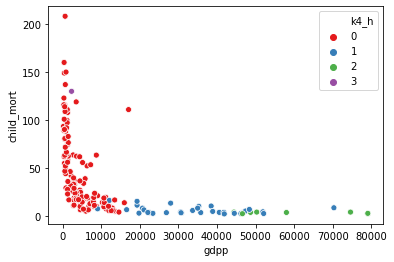

In [103]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'k4_h', data=df, palette='Set1') 

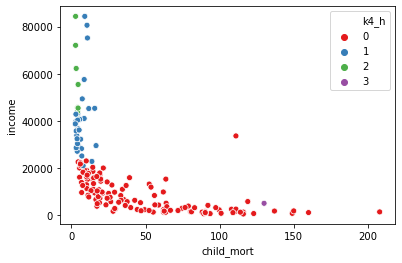

In [104]:
sns.scatterplot(x='child_mort', y='income', hue= 'k4_h', data=df, palette='Set1') 

### Cluster profiling

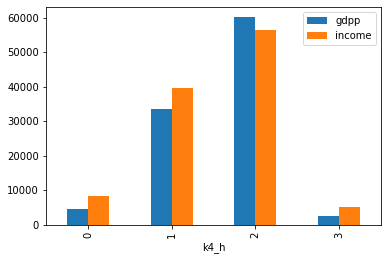

In [105]:
df[['gdpp','k4_h', 'income']].groupby('k4_h').mean().plot(kind= 'bar');

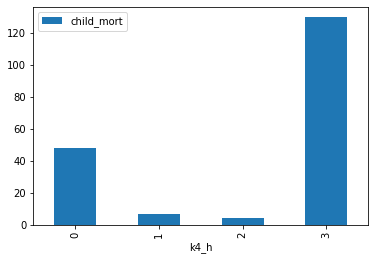

In [106]:
df[['k4_h', 'child_mort']].groupby('k4_h').mean().plot(kind= 'bar');

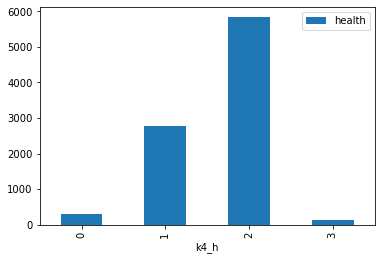

In [107]:
df[['k4_h', 'health']].groupby('k4_h').mean().plot(kind= 'bar');

### Observation: 'Cluster 0' represents the characteristics of under-developed countries.

In [108]:
c_4h = df[df.k4_h==0]


In [109]:
c_4h.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c_4h

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4,cluster_k5,k3_h,k4_h
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,2,1,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0,2,1,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,2,1,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0,2,1,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela,17.1,3847.5000,662.8500,2376.000,16500.0,45.900,75.4,2.47,13500.0,1,0,0,0,0
41,Croatia,5.5,5076.0000,1047.6000,5143.500,20100.0,0.821,76.3,1.55,13500.0,1,0,0,0,0
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700.0,1.740,76.0,1.72,14600.0,1,0,0,0,0
13,Barbados,14.2,6320.0000,1275.2000,7792.000,15300.0,0.321,76.7,1.78,16000.0,1,0,0,0,0


In [110]:
list(c_4h.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Nepal',
 'Uganda',
 'Guinea',
 'Haiti',
 'Tanzania',
 'Mali',
 'Tajikistan',
 'Benin',
 'Bangladesh',
 'Comoros',
 'Cambodia',
 'Kyrgyz Republic',
 'Chad',
 'Kenya',
 'Myanmar',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Vietnam',
 'India',
 'Uzbekistan',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Moldova',
 'Bolivia',
 'Philippines',
 'Bhutan',
 'Egypt',
 'Mongolia',
 'Congo, Rep.',
 'Sri Lanka',
 'Morocco',
 'Guatemala',
 'Micronesia, Fed. Sts.',
 'Georgia',
 'Vanuatu',
 'Ukraine',
 'El Salvador',
 'Guyana',
 'Indonesia',
 'Armenia',
 'Paraguay',
 'Cape Verde',
 'Samoa',
 'Angola',
 'Tonga',
 'Timor-Leste',
 'Fiji',
 'Jordan',
 'Albania',
 'Tunisia',
 'Belize',
 'Turkm

### Observation:
`On caomparing all models KMeans model with K=4, gives better outcome based on statistical and business point of view`

In [118]:
c2.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False],inplace=True)
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_k4
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,0,2


### Final Observation: 
`The Top 10 countries which are in direst need of aid are:`
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea
